## Introduction
As per WHO,

- Cancer is the second leading cause of death globally, and is responsible for an estimated 9.6 million deaths in 2018. Globally, about 1 in 6 deaths is due to cancer.
- Approximately 70% of deaths from cancer occur in low- and middle-income countries.
- Around one third of deaths from cancer are due to the 5 leading behavioral and dietary risks: high body mass index, low fruit and vegetable intake, lack of physical activity, tobacco use, and alcohol use.
- Many aspects of the behaviour of cancer disease are highly unpredictable. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

**OBJECTIVE:**
Build a machine learning  model that would predict the cancer death rate for the given year.

## About the data

The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Let us read the data and explore the columns. 

### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing and splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#for building, tuning and evalutaing machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,roc_auc_score,roc_curve
#for feature selection 
from sklearn.feature_selection import SelectFromModel
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [ ]:
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
print(cancer_data.shape)
print(cancer_data.columns)
cancer_data.head()

(3051, 34)
Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'Geography', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


## Data Description
There are 3051 rows and 34 columns.
The column description are as follows:

- TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
- avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
- avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
- incidenceRate: Mean per capita (100,000) cancer diagoses(a)
- medianIncome: Median income per county (b)
- popEst2015: Population of county (b)
- povertyPercent: Percent of populace in poverty (b)
- studyPerCap: Per capita number of cancer-related clinical trials per county (a)
- binnedInc: Median income per capita binned by decile (b)
- MedianAge: Median age of county residents (b)
- MedianAgeMale: Median age of male county residents (b)
- MedianAgeFemale: Median age of female county residents (b)
- Geography: County name (b)
- AvgHouseholdSize: Mean household size of county (b)
- PercentMarried: Percent of county residents who are married (b)
- PctNoHS18_24: Percent of county residents ages 18-24 highest education  attained: less than high school (b)
- PctHS18_24: Percent of county residents ages 18-24 highest education
attained: high school diploma (b)
- PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
- PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
- PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
- PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
- PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
- PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
- PctPrivateCoverage: Percent of county residents with private health coverage (b)
- PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
- PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
- PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
- PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
- PctWhite: Percent of county residents who identify as White (b)
- PctBlack: Percent of county residents who identify as Black (b)
- PctAsian: Percent of county residents who identify as Asian (b)
- PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
PctMarriedHouseholds: Percent of married households (b)
- BirthRate: Number of live births relative to number of women in county (b)

## Exploratory Data Analysis

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,785.000000,3051.000000,3051.000000,3051.000000,2899.000000,3051.000000,3051.000000,2447.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,11.107006,4.552222,7.015728,5.360342,8.267656,3.454863,10.511932,10.011218,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,34.000000,3.100000,30.650000,9.300000,48.600000,5.500000,57.500000,41.300000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.000000,5.300000,35.400000,12.300000,54.400000,7.600000,65.300000,48.700000,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,46.900000,8.100000,39.700000,16.100000,60.300000,9.700000,72.200000,55.700000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


In [ ]:
#below code will display only the columns with missing values (in percentage of missing values to the total rows)
missing_val = cancer_data.isna().sum()
print("\033[1mNumber of missing values by column:\033[0m")
print(missing_val[missing_val>0])
print("")
print("\033[1mPercentage of missing values by column:\033[0m")
missing_val[missing_val > 0]/cancer_data.shape[0]*100

Number of missing values by column:
PctSomeCol18_24            2266
PctEmployed16_Over          152
PctPrivateCoverageAlone     604
dtype: int64

Percentage of missing values by column:


PctSomeCol18_24            74.270731
PctEmployed16_Over          4.981973
PctPrivateCoverageAlone    19.796788
dtype: float64

**OBSERVATIONS AND INSIGHTS**
1. The level of data is county ie. 'Geography'. Each row contains information about one county
2. The Target variable is 'TARGET_deathRate' and ranges between 66.3 to 362.8 with a mean/median of about 178
3. There are  missing values in the dataset in the columns 'PctSomeCol18_24','PctEmployed16_Over','PctPrivateCoverageAlone'
4. The column 'PctSomeCol18_24' has over 70% of missing values and hence should be dropped. The other two columns can be filled using mean/median values
5. There are 2 categorical variables -  binnedInc and Geography and the rest are numeric variables

**The problem to predict cancer rate is a regression problem since the target variable is continuous. We will be using Mean Squared Error as our model evaluation metric**. 

- When we take a look at the problem, it seems like the birthrate and education variables may not have a huge impact on the cancer death rate
- We can try replacing the binnedInc by using the mean of the bounds or, keeping the highest/lowest value. But, since we have mean and median incomes already, the income bin might not be useful
- The variables denoting health coverage, income, education (may be positively correlated with income) and poverty percentage might infulence death rate of a particular county as the ability to opt for special treatment depends on the person's knowledge, insurance and education 
- The age group may have some impact as well since certain cancers are more prominent in older age groups

### Correlation Matrix
Let us take a look at how the numerical variables are correlated to each other and the target variable using correlation matrix

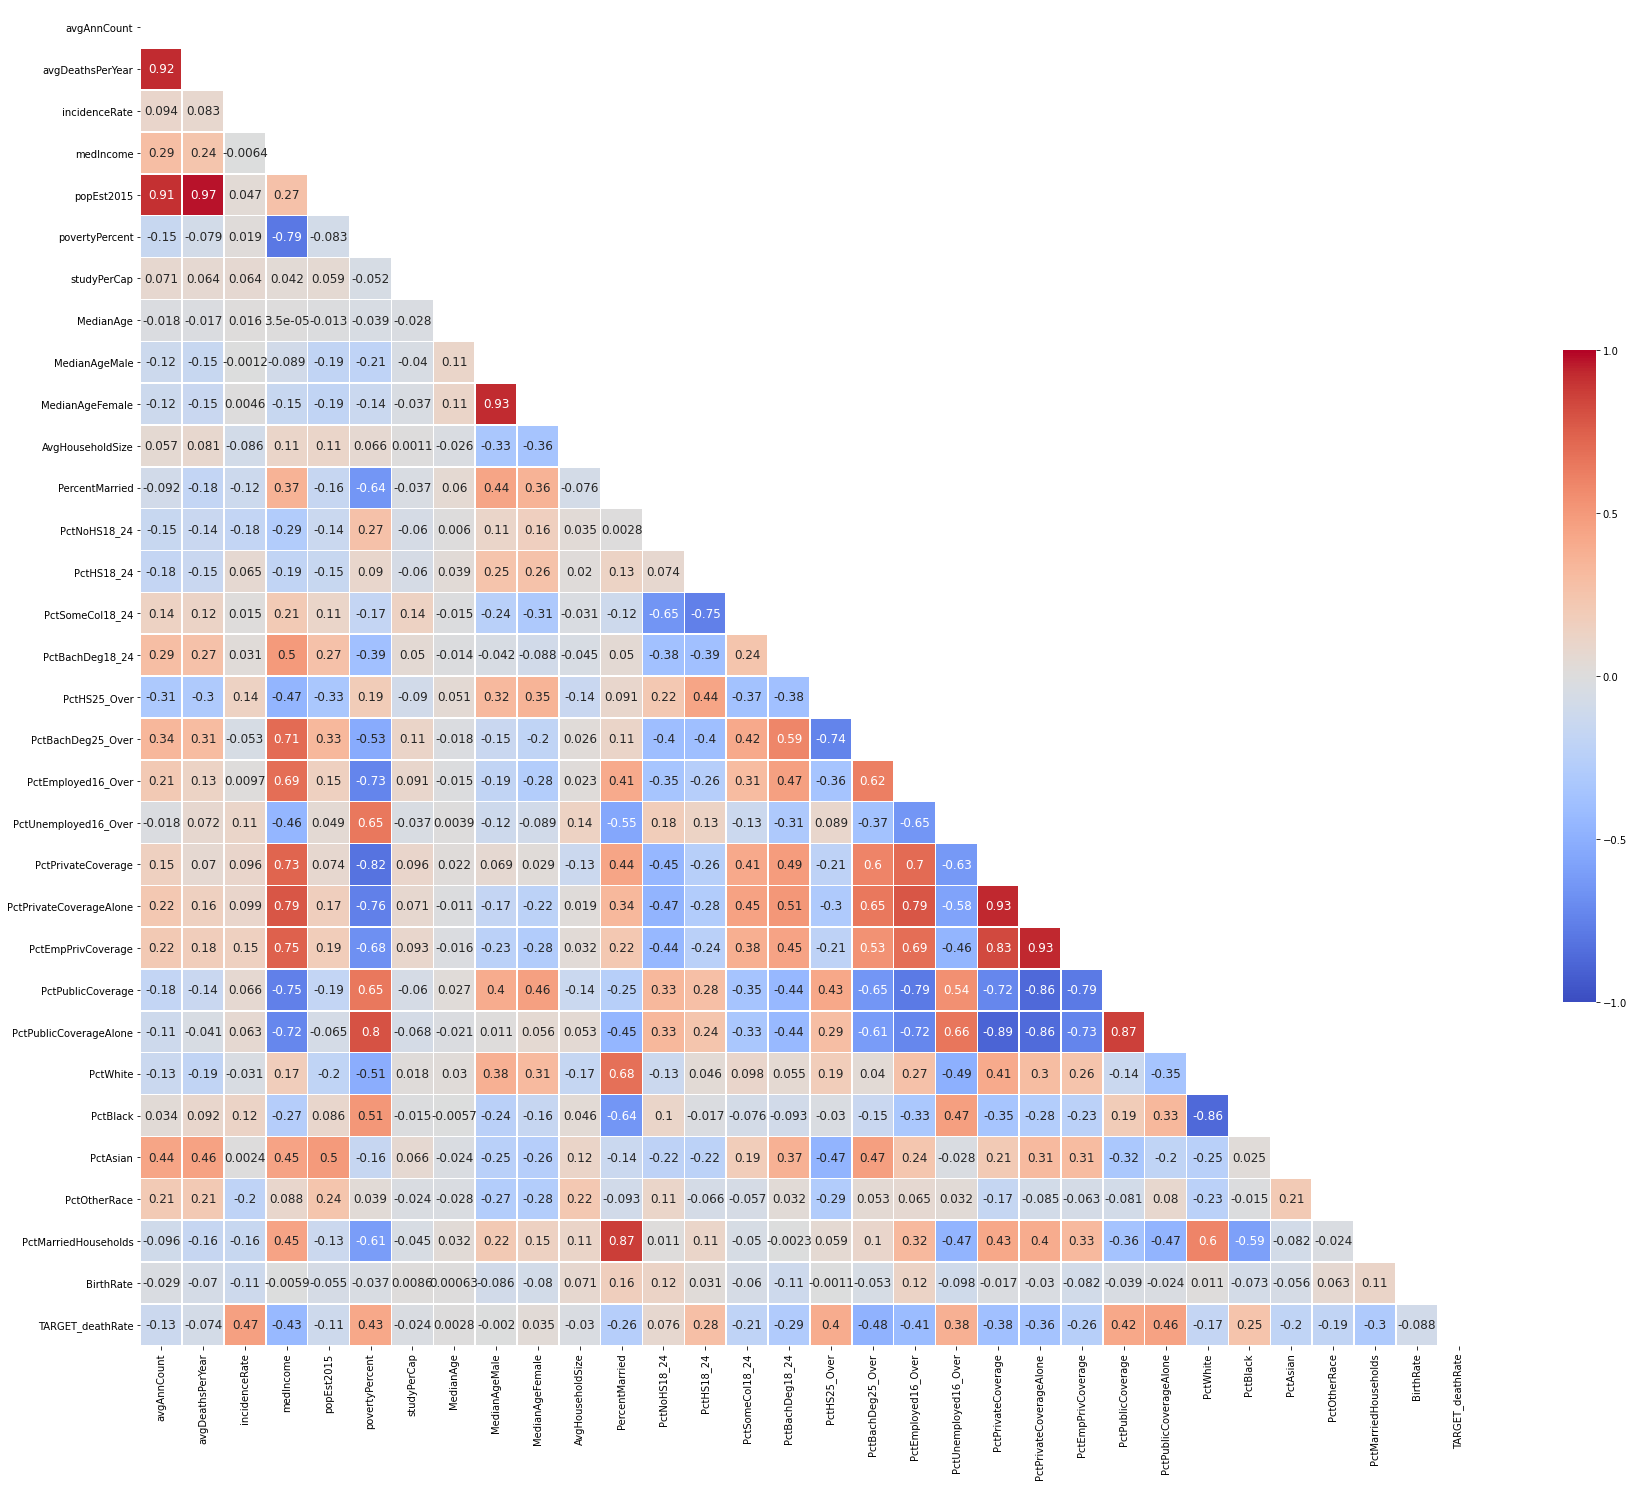

In [ ]:
num_data = cancer_data.drop(['Geography','binnedInc'],axis=1)
corr_matrix = num_data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(30, 30))

heatmap = sns.heatmap(corr_matrix,
                       mask = mask,
                       square = True,
                       linewidths = .5,
                       cmap = 'coolwarm',
                       cbar_kws = {'shrink': .4,
                                 'ticks' : [-1, -.5, 0, 0.5, 1]},
                       vmin = -1,
                       vmax = 1,
                       annot = True,
                       annot_kws = {"size": 12})

# add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**OBSERVATIONS AND INSIGHTS**

The cancer death rate is:
1. **Positively correlated** with incidenceRate, poverty percentage, Median ages of females, PctNoHS18_24, percentage of unemployed people, percentage of people with government provided heathcare, people who identify their ethnicity as black.
2. **Negatively correlated** with population of county, percentMarried, PctSomeCol18_24,PctSomeDeg18_24,PctBachDeg25_Over, percentage of employed people, people with some or only private health coverage, people with employee private coverage, Married households and other ethinicities
3. **The top variables that seem to be positively correlated to high death rate are:**
 - incidenceRate (0.47)
 - PctPublicCoverageAlone (0.46)
 - povertyPercent (0.43)
 - PctPublicCoverage (0.42)
 - PctHS25_Over (0.4)
 - PctUnemployed16_Over(0.38)
4. **The top variables that seem to be negatively correlated to high death rate are:**
 - PctBachDeg25_Over (-0.48)
 - medianIncome (-0.43)
 - PctEmployed16_Over (-0.41)
 - PctPvtCoverage (-0.38)
 - PctPvtCoverageAlone (-0.36)

 Note: The minus sign shows negative nature of the correlation

### Check the data distribution of each feature

Text(0.5, 1.0, 'Histograms - Distribution of data')

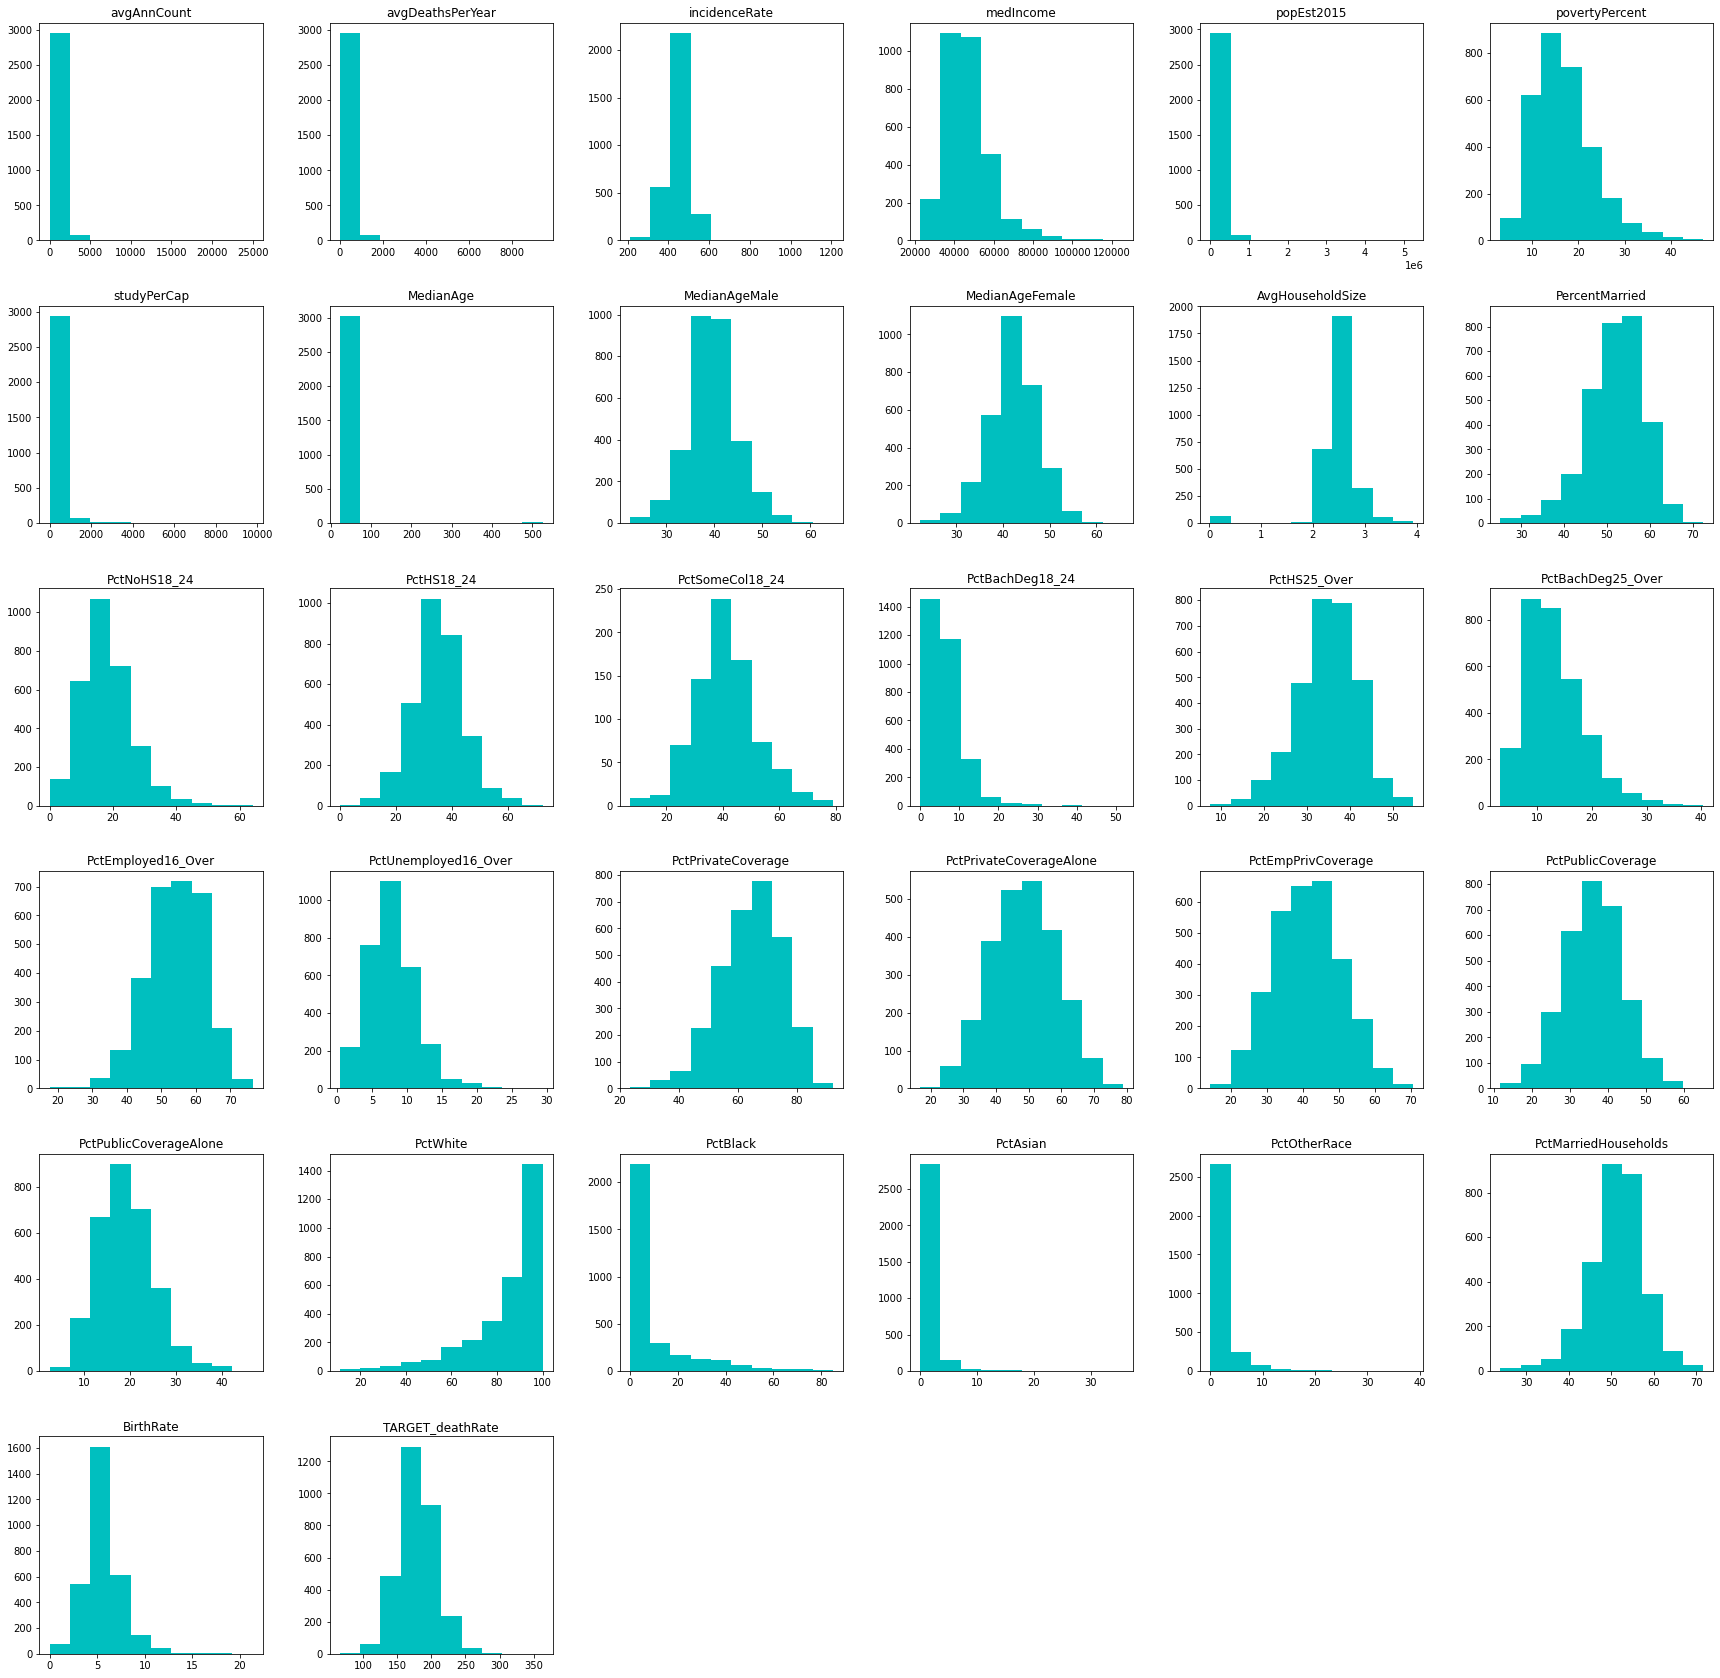

In [70]:
num_data.hist(figsize=(30,30),color='c',grid=False);
plt.title("Histograms - Distribution of data")

We can see that not all variables have a normal distribution. Many variables show skewness. Apart from that, the values of columns are on different scales. Age and percentage can be till 100 but the incidence rate and income can reach even 10,000. If our model has lower accuracy (higher MSE), we can scale our data and see if it reduces the MSE.

### Separate the Input and Target Features of the data

We separate the target variable from the feature variables and split the dataset into train and test sets before doing further analysis. We perform preprocesing separately on the train and test datasets to prevent data leakage.

In [ ]:
X = cancer_data.drop('TARGET_deathRate',axis=1)
y = cancer_data['TARGET_deathRate']
print("Shape of X Dataframe: ",X.shape)
print(X.head())
print("")
print("Shape of y Series: ",y.shape)
y.head()

Shape of X Dataframe:  (3051, 33)
   avgAnnCount  avgDeathsPerYear  ...  PctMarriedHouseholds  BirthRate
0         19.0                 8  ...             62.511457  15.157116
1         88.0                34  ...             61.641045   3.293510
2        195.0                83  ...             53.978102   6.390328
3        116.0                55  ...             51.013143   5.124836
4         80.0                35  ...             50.566426   3.897033

[5 rows x 33 columns]

Shape of y Series:  (3051,)


0    160.3
1    194.9
2    196.5
3    230.9
4    162.2
Name: TARGET_deathRate, dtype: float64

### Split the data into Train and Test Sets

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2440, 33)
(2440,)
(611, 33)
(611,)


## Data Preparation and Preprocessing

For training and test data:
1. Drop irrelevant columns 
2. Missing Value Imputation
3. Feature Scaling

In [ ]:
X_train.drop(columns = ['binnedInc','Geography','PctSomeCol18_24'],axis=1,inplace=True)
print(X_train.shape)
#fill missing values with mean
X_train['PctEmployed16_Over'].fillna(X_train['PctEmployed16_Over'].median(),inplace=True)
X_train['PctPrivateCoverageAlone'].fillna(X_train['PctPrivateCoverageAlone'].median(),inplace=True)
#QC: Check if any missing values exist
print(X_train.shape)
X_train.isna().any().any()

(2440, 30)
(2440, 30)


False

In [ ]:
X_test.drop(columns = ['binnedInc','Geography','PctSomeCol18_24'],axis=1,inplace=True)
print(X_test.shape)
#fill missing values with mean
X_test['PctEmployed16_Over'].fillna(X_test['PctEmployed16_Over'].median(),inplace=True)
X_test['PctPrivateCoverageAlone'].fillna(X_test['PctPrivateCoverageAlone'].median(),inplace=True)
#QC: Check if any missing values exist
print(X_test.shape)
print(X_test.isna().any().any())

(611, 30)
(611, 30)
False


The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [ ]:
#std-scaling - fit-transform for train and only transform for test
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

Text(0.5, 1.0, 'Histograms - Distribution of Scaled data')

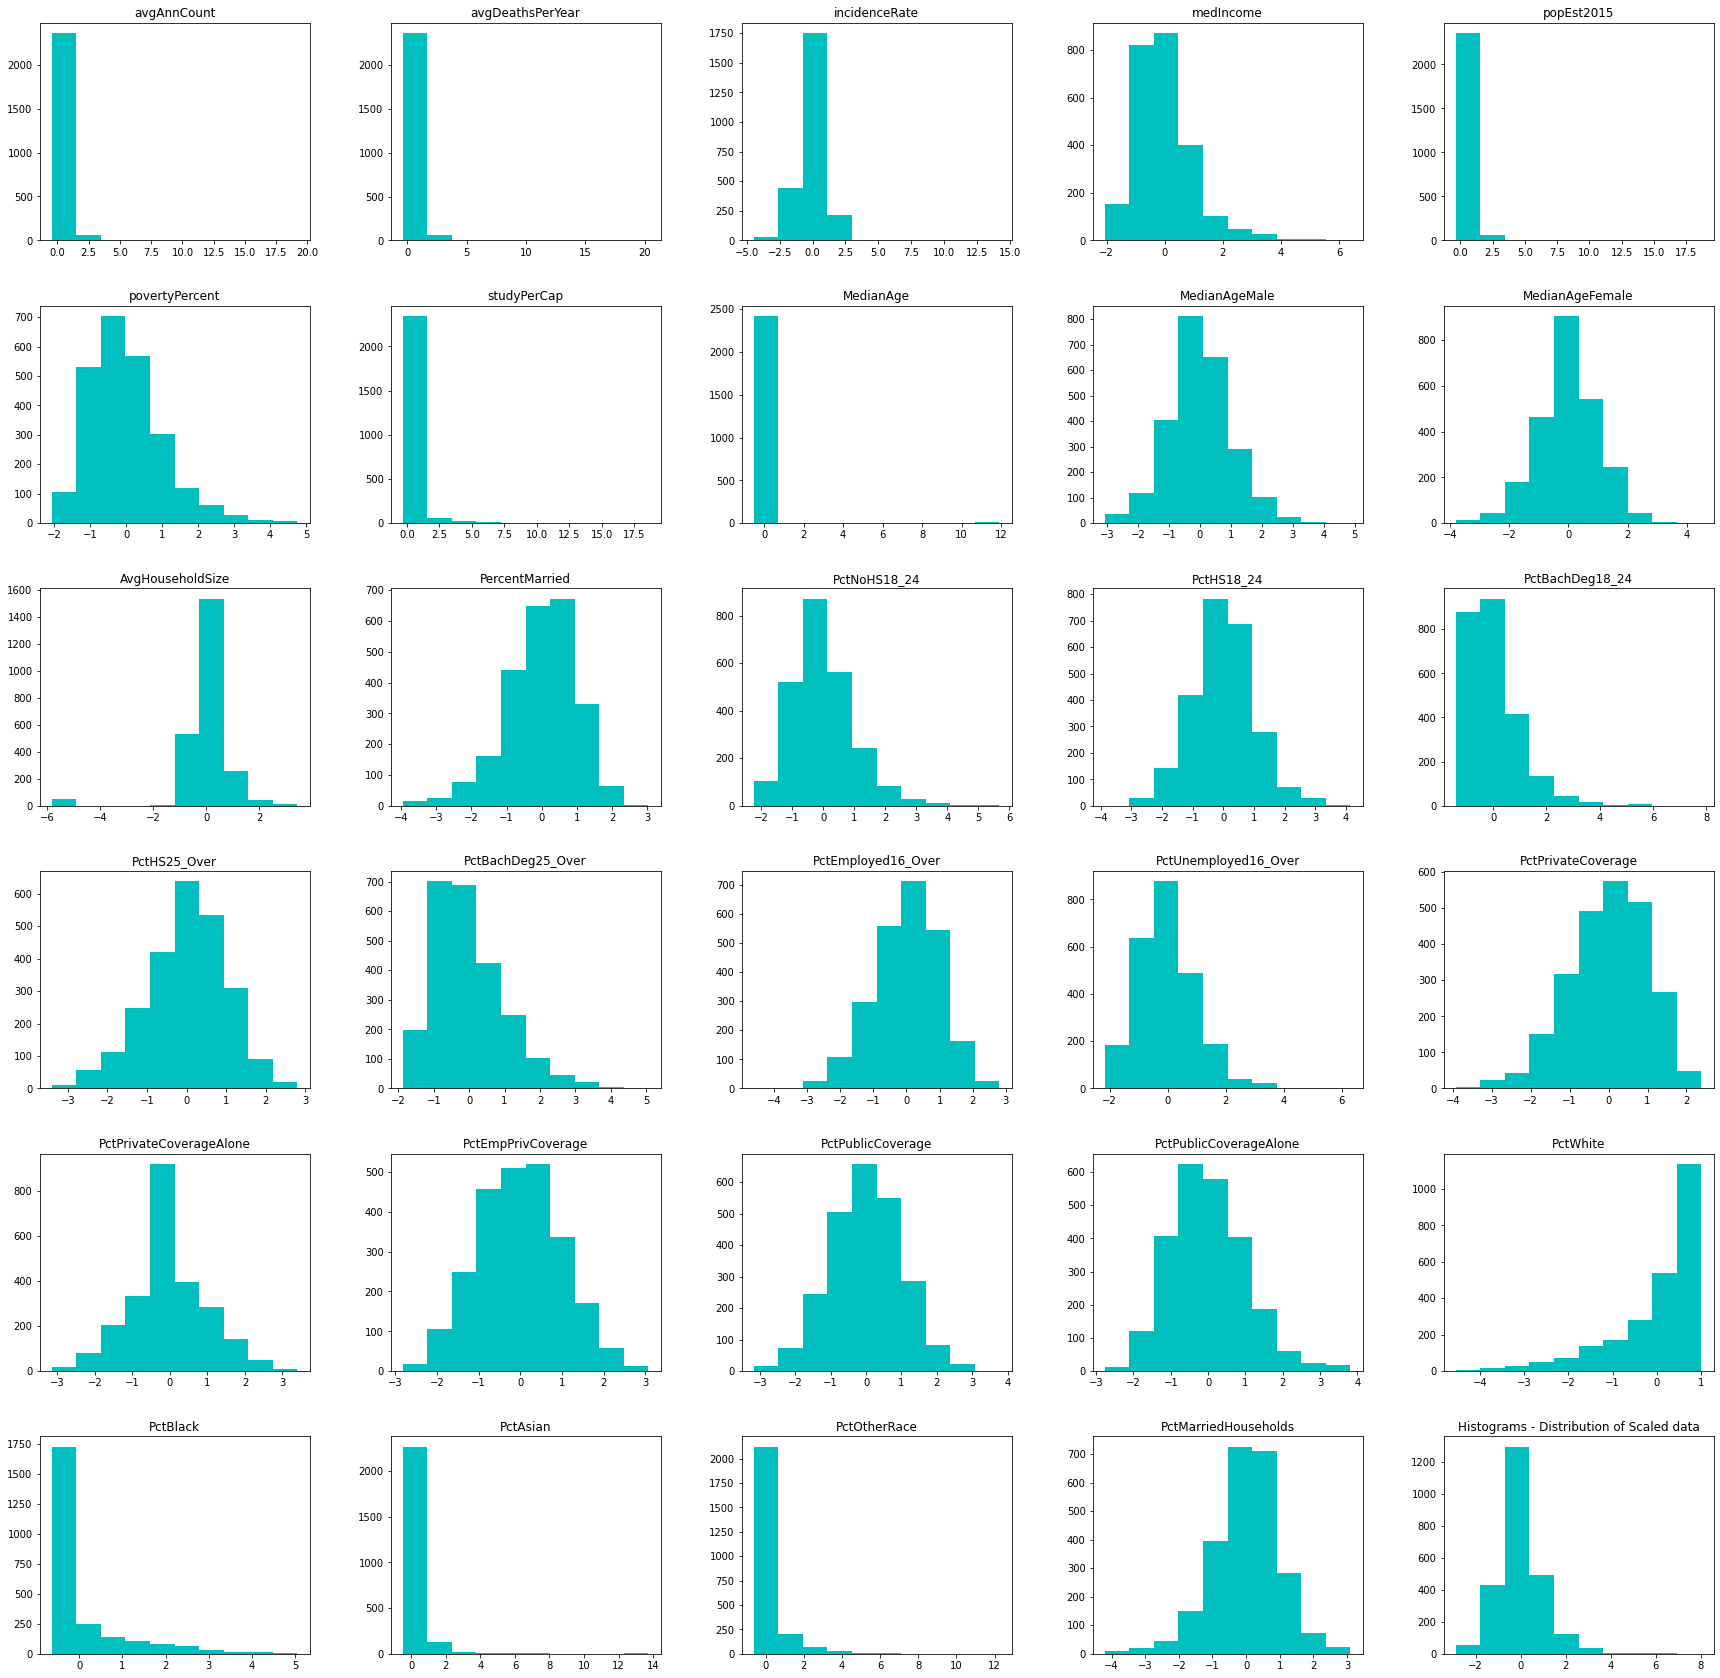

In [ ]:
final_tr = pd.DataFrame(data=X_train_std)
final_tr.columns= X_train.columns
final_tr.hist(figsize=(30,30),color='c',grid=False);
plt.title("Histograms - Distribution of Scaled data")

After standardization, our data has comparable values, with their mean centered around 0

### Build a basic Machine Learning Model

Let us start with a basic model - Linear Regression

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
y_train_pred = reg_model.predict(X_train)

### Evaluating the basic model with various Evaluation Metrics

In [ ]:
# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("r2 score: ",r2_score(y_train,y_train_pred))

# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score: ",r2_score(y_test,y_pred))

FOR TRAIN DATA
mean_squared_error:  31.97703197622948
mean_absolute_error:  3.795530327868847
root_mean_squared_error:  5.654823779414304
r2 score:  0.9588204468582298
FOR TEST DATA
mean_squared_error:  217.9910717002788
mean_absolute_error:  10.511665993548455
root_mean_squared_error:  14.764520706757764
r2 score:  0.6855629845045779


### Trying out other Machine Learning Models and Evaluating them

**DECISION TREE**

In [ ]:
dt_model= DecisionTreeRegressor(random_state=1,max_depth=15)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
y_train_pred = dt_model.predict(X_train)
# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))


# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))


FOR TRAIN DATA
mean_squared_error:  12.045238380859782
mean_absolute_error:  1.3905701022431973
root_mean_squared_error:  3.470625070626296
FOR TEST DATA
mean_squared_error:  413.225135311453
mean_absolute_error:  12.286566886436626
root_mean_squared_error:  20.32793977046009


**RANDOM FOREST**

In [ ]:
rf_model= RandomForestRegressor(random_state=2)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)
# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))



# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

FOR TRAIN DATA
mean_squared_error:  31.97703197622948
mean_absolute_error:  3.795530327868847
root_mean_squared_error:  5.654823779414304
FOR TEST DATA
mean_squared_error:  222.10769918494276
mean_absolute_error:  9.991296235679219
root_mean_squared_error:  14.903278135529202


**XGBOOST**

Unscaled Data

[04:59:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
FOR TRAIN DATA
mean_squared_error:  31.97703197622948
mean_absolute_error:  3.795530327868847
root_mean_squared_error:  5.654823779414304
 
FOR TEST DATA
mean_squared_error:  217.9910717002788
mean_absolute_error:  10.511665993548455
root_mean_squared_error:  14.764520706757764
 
FEATURE IMPORTANCES: [0.01687482 0.02508617 0.08813426 0.03612494 0.01837441 0.16339338
 0.00998887 0.01086498 0.01548308 0.01387559 0.01787139 0.01833565
 0.0109223  0.01750624 0.01017083 0.04486259 0.1688304  0.01485097
 0.08822402 0.03990288 0.00938673 0.00646511 0.0079553  0.0476087
 0.01446832 0.02201343 0.00852307 0.02834731 0.01749823 0.00805603]


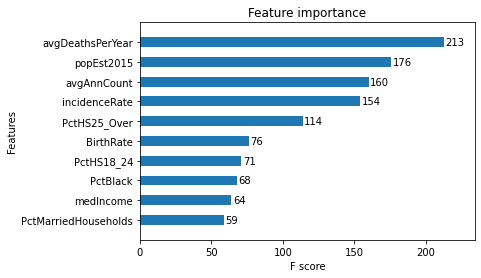

<Figure size 1440x720 with 0 Axes>

XGB BASELINE MODEL ACCURACY: 217.9910717002788


In [ ]:
#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 0,n_estimators=300,learning_rate = 0.08)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

xgb_ac = mean_squared_error(y_test,y_pred)

# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(" ")

# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print(" ")

print("\033[1mFEATURE IMPORTANCES:\033[0m", xgb_model.feature_importances_)

#plot feature importance
plot_importance(xgb_model,height=0.5,grid=False,max_num_features=10)
plt.figure(figsize=(20,10))
plt.show()

print("\033[1mXGB BASELINE MODEL ACCURACY:\033[0m", xgb_ac)

Scaled Data

[05:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
FOR TRAIN DATA
mean_squared_error:  31.97703197622948
mean_absolute_error:  3.795530327868847
root_mean_squared_error:  5.654823779414304
 
FOR TEST DATA
mean_squared_error:  218.01446246898007
mean_absolute_error:  10.516931998944322
root_mean_squared_error:  14.765312813109652
 
FEATURE IMPORTANCES: [0.01687482 0.02508617 0.08813426 0.03612494 0.01837441 0.16339338
 0.00998887 0.01086498 0.01548308 0.01387559 0.01787139 0.01833565
 0.0109223  0.01750624 0.01017083 0.04486259 0.1688304  0.01485097
 0.08822402 0.03990288 0.00938673 0.00646511 0.0079553  0.0476087
 0.01446832 0.02201343 0.00852307 0.02834731 0.01749823 0.00805603]


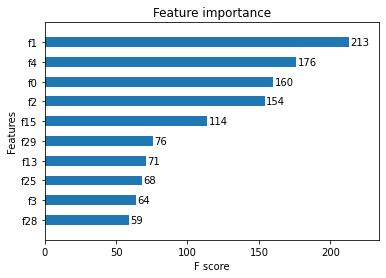

<Figure size 1440x720 with 0 Axes>

XGB BASELINE MODEL ACCURACY (using scaled data): 218.01446246898007


In [ ]:
#!pip install xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 0,n_estimators=300,learning_rate = 0.08)
xgb_model.fit(X_train_std, y_train)


y_pred = xgb_model.predict(X_test_std)

xgb_ac = mean_squared_error(y_test,y_pred)

# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(" ")

# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print(" ")

print("\033[1mFEATURE IMPORTANCES:\033[0m", xgb_model.feature_importances_)

#plot feature importance
plot_importance(xgb_model,height=0.5,grid=False,max_num_features=10)
plt.figure(figsize=(20,10))
plt.show()

print("\033[1mXGB BASELINE MODEL ACCURACY (using scaled data):\033[0m", xgb_ac)

XGBoost has performed the best among chosen machine learning models. We will pick XGBoost and try to optimize the performance using hyperparameter tuning. Also, there is not much improvment by using scaled data in place of unscaled data. Hence, we will proceed with the original unscaled version of data.

### Hyperparameter Tuning

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. 
- **estimator:** Pass the model instance for which you want to check the hyperparameters
- **params_grid:** the dictionary object that holds the hyperparameters you want to try
- **scoring:** evaluation metric that you want to use
- **cv:** number of cross-validation you have to try for each selected set of hyperparameters
- **verbose:** 0 = silent, 1 = progress bar, 2 = one line per epoch
- **n_jobs:** number of processes you wish to run in parallel for this task if it is set to -1 it will use all available processors


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,3,4],
    'subsample': [0.8,1],
    'min_child_weight':[10,30],
    'learning_rate':[0.08,0.1],
    'n_estimators': [500,1000,10000]}
xgb = XGBRegressor(random_state=0)

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 25.7min finished


[06:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1], 'max_depth': [2, 3, 4],
                         'min_child_weight': [10, 30],


In [54]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 30,
 'n_estimators': 10000,
 'subsample': 1}

### Evaluating the selected model 

In [57]:
xgb_tuned = XGBRegressor(learning_rate=0.1,max_depth=2,min_child_weight=30,n_estimators=10000,subsample=1,random_state=0)
xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
y_train_pred = xgb_tuned.predict(X_train)

# For training data
print("\033[1mFOR TRAIN DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error: ",mean_absolute_error(y_train,y_train_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(" ")

# For test data
print("\033[1mFOR TEST DATA\033[0m")
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print(" ")

[06:55:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
FOR TRAIN DATA
mean_squared_error:  0.6261659677770312
mean_absolute_error:  0.5392952559424234
root_mean_squared_error:  0.791306494208806
 
FOR TEST DATA
mean_squared_error:  118.86055139356219
mean_absolute_error:  6.52460264714767
root_mean_squared_error:  10.902318624657884
 


We can see that the MSE has reduced significantly after hyperparameter tuning. Let us check if the MSE reduces further after selecting only relevant features. If it does, we will pick that model, else we will finalize this model.

### Feature Selection Techniques

#### Feature Selection Using XGBoost

In [68]:
selection = SelectFromModel(xgb_tuned)
selection.fit(X_train, y_train)
feature_idx = selection.get_support()
feature_name = X_train.columns[feature_idx]

print("\033[1mSelected Features:\n\033[10")
print(" ")
print(feature_name)
print(" ")
# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)

[07:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Selected Features:
[10
 
Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctUnemployed16_Over', 'PctPublicCoverageAlone'],
      dtype='object')
 
[07:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
y_pred = selection_model.predict(select_X_test)
xgb_selection_model_ac = mean_squared_error(y_test,y_pred)
print("XGB Selected Features Model Accuracy:", xgb_selection_model_ac)

XGB Selected Features Model Accuracy: 292.0726299384421


We will stick to the model created after hyperparameter tuning considering all the features. The final MSE is 118.86